#### Load the dataset

In [1]:
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df= pd.read_csv('bounding_boxes.csv')
df.head()

,List A,List B,Merge
0,"[2258, 2037, 2327, 2103]","[2322, 2019, 2433, 2117]",1.0
1,"[957, 2522, 1021, 2588]","[1100, 2509, 1222, 2606]",0.0
2,"[1635, 1274, 1696, 1334]","[1697, 1263, 1825, 1352]",1.0
3,"[2156, 1206, 2220, 1268]","[2217, 1191, 2337, 1286]",1.0
4,"[540,1031,588,1126]","[603, 1017, 814, 1112]",0.0


#### Exploring the data

In [3]:
df.shape

(2503, 3)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2503 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   List A  2503 non-null   object 
 1   List B  2503 non-null   object 
 2   Merge   2350 non-null   float64
dtypes: float64(1), object(2)
memory usage: 58.8+ KB


In [5]:
df.isnull().sum()

List A      0
List B      0
Merge     153
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:

df.head()

,List A,List B,Merge
0,"[2258, 2037, 2327, 2103]","[2322, 2019, 2433, 2117]",1.0
1,"[957, 2522, 1021, 2588]","[1100, 2509, 1222, 2606]",0.0
2,"[1635, 1274, 1696, 1334]","[1697, 1263, 1825, 1352]",1.0
3,"[2156, 1206, 2220, 1268]","[2217, 1191, 2337, 1286]",1.0
4,"[540,1031,588,1126]","[603, 1017, 814, 1112]",0.0


In [8]:
df.isnull().sum()

List A    0
List B    0
Merge     0
dtype: int64

In [9]:
df['Merge'] = df['Merge'].astype('int32')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 0 to 2502
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   List A  2350 non-null   object
 1   List B  2350 non-null   object
 2   Merge   2350 non-null   int32 
dtypes: int32(1), object(2)
memory usage: 64.3+ KB


#### Feature Engineering

In [11]:
# remove the brackets
df['List A'] = df['List A'].str.strip('[]')
df['List B'] = df['List B'].str.strip('[]')

In [12]:
# convert string to integers
df['List A'] = df['List A'].apply(lambda x: [int(i) for i in x.split(',')])
df['List B'] = df['List B'].apply(lambda x: [int(i) for i in x.split(',')])

In [13]:
df.head()

,List A,List B,Merge
0,"[2258, 2037, 2327, 2103]","[2322, 2019, 2433, 2117]",1
1,"[957, 2522, 1021, 2588]","[1100, 2509, 1222, 2606]",0
2,"[1635, 1274, 1696, 1334]","[1697, 1263, 1825, 1352]",1
3,"[2156, 1206, 2220, 1268]","[2217, 1191, 2337, 1286]",1
4,"[540, 1031, 588, 1126]","[603, 1017, 814, 1112]",0


In [14]:
type(df['List A'][0])

list

In [15]:

#extract the coordinates
df['x1_min'] = df['List A'].apply(lambda x: x[0])
df['y1_min'] = df['List A'].apply(lambda x: x[1])
df['x1_max'] = df['List A'].apply(lambda x: x[2])
df['y1_max'] = df['List A'].apply(lambda x: x[3])


In [16]:
df['x2_min'] = df['List B'].apply(lambda x: x[0])
df['y2_min'] = df['List B'].apply(lambda x: x[1])
df['x2_max'] = df['List B'].apply(lambda x: x[2])
df['y2_max'] = df['List B'].apply(lambda x: x[3])


In [17]:
df.head(2)

,List A,List B,Merge,x1_min,y1_min,x1_max,y1_max,x2_min,y2_min,x2_max,y2_max
0,"[2258, 2037, 2327, 2103]","[2322, 2019, 2433, 2117]",1,2258,2037,2327,2103,2322,2019,2433,2117
1,"[957, 2522, 1021, 2588]","[1100, 2509, 1222, 2606]",0,957,2522,1021,2588,1100,2509,1222,2606


In [18]:
#calculate distances between coordinates
df['xmin_dist'] = abs(df['x2_min']-df['x1_min'])
df['ymin_dist'] = abs(df['y2_min']-df['y1_min'])
df['xmax_dist'] = abs(df['x2_max']-df['x1_max'])
df['ymax_dist'] = abs(df['y2_max']-df['y1_max'])


In [19]:
#Calculate centroids for bbox1 and bbox2
df['bb1_centroid_x'] = (df['x1_min']+df['x1_max'])/2
df['bb1_centroid_y'] = (df['y1_min']+df['y1_max'])/2
df['bb2_centroid_x'] = (df['x2_min']+df['x2_max'])/2
df['bb2_centroid_y'] = (df['y2_min']+df['y2_max'])/2

In [20]:
df['centroid_x_dist'] = abs(df['bb1_centroid_x']-df['bb2_centroid_x'])
df['centroid_y_dist'] = abs(df['bb1_centroid_y']-df['bb2_centroid_y'])

In [21]:
#distance between the two centroids
df['centroid_dist'] = df['centroid_x_dist']**2+df['centroid_y_dist']**2

In [22]:
df['centroid_dist'] = df.apply(lambda row:math.sqrt(row['centroid_dist']),axis =1)

In [23]:
#The range of Intersection over Union (IoU) values typically ranges from 0 to 1.

#IoU = 0: Indicates no overlap between the bounding boxes. They do not intersect at all.
#IoU = 1: Indicates perfect overlap between the bounding boxes. One bounding box
#completely overlaps the other.

def calculate_iou(bbox1, bbox2):
    x1 = max(bbox1[0], bbox2[0])
    y1 = max(bbox1[1], bbox2[1])
    x2 = min(bbox1[2], bbox2[2])
    y2 = min(bbox1[3], bbox2[3])

    # Calculate intersection area
    intersection_area = max(0, x2 - x1 + 1) * max(0, y2 - y1 + 1)

    # Calculate areas of bounding boxes
    bbox1_area = (bbox1[2] - bbox1[0] + 1) * (bbox1[3] - bbox1[1] + 1)
    bbox2_area = (bbox2[2] - bbox2[0] + 1) * (bbox2[3] - bbox2[1] + 1)

    # Calculate union area
    union_area = bbox1_area + bbox2_area - intersection_area

    # Calculate IoU
    iou = intersection_area / union_area

    return iou

def calculate_iou_df(df):
    iou_values = []
    for _, row in df.iterrows():
        bbox1 = row[['x1_min', 'y1_min', 'x1_max', 'y1_max']]
        bbox2 = row[['x2_min', 'y2_min', 'x2_max', 'y2_max']]
        iou = calculate_iou(bbox1, bbox2)
        iou_values.append(iou)
    return iou_values


# Calculate IoU for each pair of bounding boxes
df['IOU'] = calculate_iou_df(df)

<AxesSubplot: xlabel='Merge', ylabel='count'>

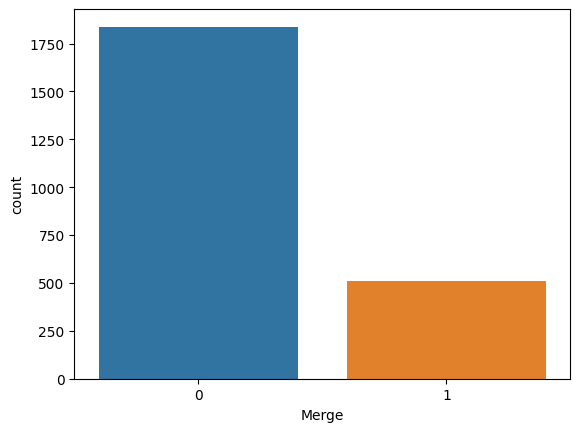

In [24]:
sns.countplot(x='Merge',data=df)

In [25]:
df['Merge'].value_counts()

0    1838
1     512
Name: Merge, dtype: int64

The distribution of data indicate that the dataset is imbalanced.Techniques to handle imbalanced dataset highly depends on the domain and specific application of the problem statement. Hence in this case, the model is trained on imbalanced dataset.

In [26]:
df.drop(['List A','List B'],axis =1 ,inplace =True)

In [27]:
df.head()

,Merge,x1_min,y1_min,x1_max,y1_max,x2_min,y2_min,x2_max,y2_max,xmin_dist,...,xmax_dist,ymax_dist,bb1_centroid_x,bb1_centroid_y,bb2_centroid_x,bb2_centroid_y,centroid_x_dist,centroid_y_dist,centroid_dist,IOU
0,1,2258,2037,2327,2103,2322,2019,2433,2117,64,...,106,14,2292.5,2070.0,2377.5,2068.0,85.0,2.0,85.023526,0.026145
1,0,957,2522,1021,2588,1100,2509,1222,2606,143,...,201,18,989.0,2555.0,1161.0,2557.5,172.0,2.5,172.018168,0.000000
2,1,1635,1274,1696,1334,1697,1263,1825,1352,62,...,129,18,1665.5,1304.0,1761.0,1307.5,95.5,3.5,95.564115,0.000000
3,1,2156,1206,2220,1268,2217,1191,2337,1286,61,...,117,18,2188.0,1237.0,2277.0,1238.5,89.0,1.5,89.012640,0.016301
4,0,540,1031,588,1126,603,1017,814,1112,63,...,226,14,564.0,1078.5,708.5,1064.5,144.5,14.0,145.176617,0.000000


12 additional columns have been added to the original dataframe after feature engineering. These newly derived features will help model to learn the dataset efficiently

#### Train Test Split

In [28]:
X= df.drop('Merge',axis=1)
y=df['Merge']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0,stratify =y)

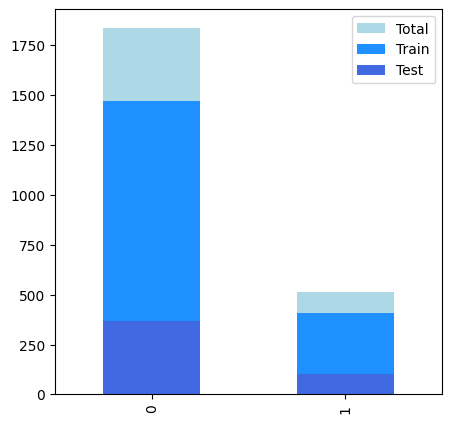

In [31]:
fig, ax = plt.subplots(figsize=(5, 5))
df['Merge'].value_counts().plot(
    kind="bar", color="lightblue", ax=ax, label="Total"
)
y_train.value_counts().plot(kind="bar", color="dodgerblue", ax=ax, label="Train")
y_test.value_counts().plot(kind="bar", color="royalblue", ax=ax, label="Test")
plt.legend()

In [31]:
X_train

,x1_min,y1_min,x1_max,y1_max,x2_min,y2_min,x2_max,y2_max,xmin_dist,ymin_dist,xmax_dist,ymax_dist,bb1_centroid_x,bb1_centroid_y,bb2_centroid_x,bb2_centroid_y,centroid_x_dist,centroid_y_dist,centroid_dist,IOU
373,4657,2438,4719,2522,4691,2400,5018,2539,34,38,299,17,4688.0,2480.0,4854.5,2469.5,166.5,10.5,166.830753,0.050502
883,2775,1192,2850,1264,2841,1184,2968,1280,66,8,118,16,2812.5,1228.0,2904.5,1232.0,92.0,4.0,92.086915,0.042358
1813,1331,1686,1429,1725,1344,1558,1412,1683,13,128,17,42,1380.0,1705.5,1378.0,1620.5,2.0,85.0,85.023526,0.000000
658,2624,1429,2686,1487,2608,1304,2707,1428,16,125,21,59,2655.0,1458.0,2657.5,1366.0,2.5,92.0,92.033961,0.000000
2385,3112,689,3198,840,3212,709,3473,782,100,20,275,58,3155.0,764.5,3342.5,745.5,187.5,19.0,188.460208,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,794,741,870,866,867,766,975,845,73,25,105,21,832.0,803.5,921.0,805.5,89.0,2.0,89.022469,0.017678
1832,2269,2954,2381,3077,2398,2978,2535,3062,129,24,154,15,2325.0,3015.5,2466.5,3020.0,141.5,4.5,141.571537,0.000000
810,645,1845,688,1928,709,1849,918,1931,64,4,230,3,666.5,1886.5,813.5,1890.0,147.0,3.5,147.041661,0.000000
888,2787,924,2842,1055,2846,947,2983,1030,59,23,141,25,2814.5,989.5,2914.5,988.5,100.0,1.0,100.005000,0.000000


In [32]:
len(X_train),len(X_test)

(1880, 470)

#### Train Model using Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(solver='lbfgs',multi_class='auto',C=1)
model.fit(X_train,y_train)


c:\Users\saras\steffysara\VS_Code_Projects\Comment_Toxicity_Classifier\venv\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

#### Predict and Evaluate Results

In [34]:
model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [35]:
model.score(X_test,y_test)

0.8063829787234043

Text(50.722222222222214, 0.5, 'True labels')

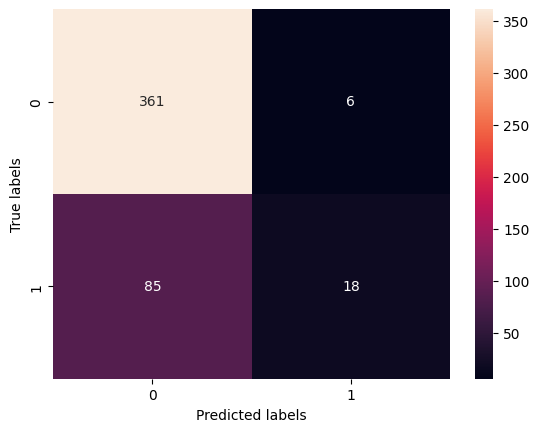

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89       367
           1       0.75      0.17      0.28       103

    accuracy                           0.81       470
   macro avg       0.78      0.58      0.59       470
weighted avg       0.80      0.81      0.76       470



In [44]:
import joblib
joblib.dump(model, 'model.pkl')


['model.pkl']

In [45]:
model = joblib.load('model.pkl')

#### Train Model using Random Forest Classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
y_predrf = rf_model.predict(X_test)

In [52]:
print(classification_report(y_test,y_predrf))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       367
           1       1.00      0.97      0.99       103

    accuracy                           0.99       470
   macro avg       1.00      0.99      0.99       470
weighted avg       0.99      0.99      0.99       470



Text(50.722222222222214, 0.5, 'True labels')

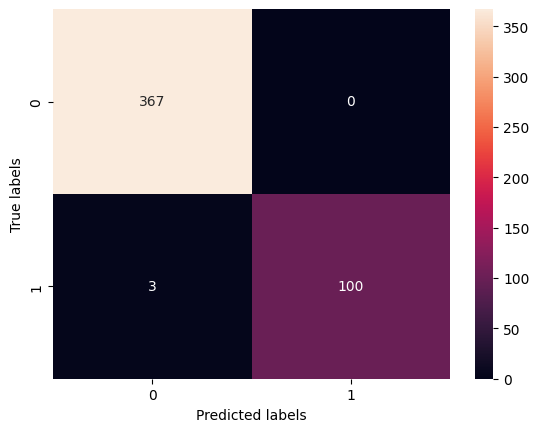

In [54]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predrf)
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')

In [56]:
import joblib
joblib.dump(rf_model, 'rf_model.pkl')

['rf_model.pkl']

In [57]:
rf_model = joblib.load('rf_model.pkl')

Random Forest model gave good accuracy of 99% on testing data.  

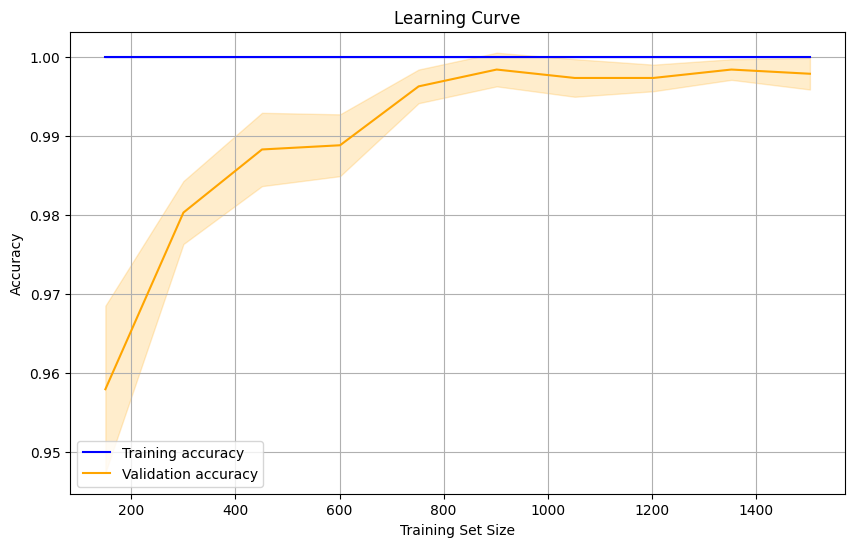

In [61]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5):
    """
    Plot learning curves for a given estimator.

    Parameters:
    - estimator: The machine learning model.
    - X: The input features.
    - y: The target labels.
    - train_sizes: The proportions of the training set sizes to use for plotting.
    - cv: The number of cross-validation folds.

    Returns:
    - None
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=cv, scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_mean, label='Validation accuracy', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.title('Learning Curve')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Plot learning curve
plot_learning_curve(rf_model, X_train, y_train)


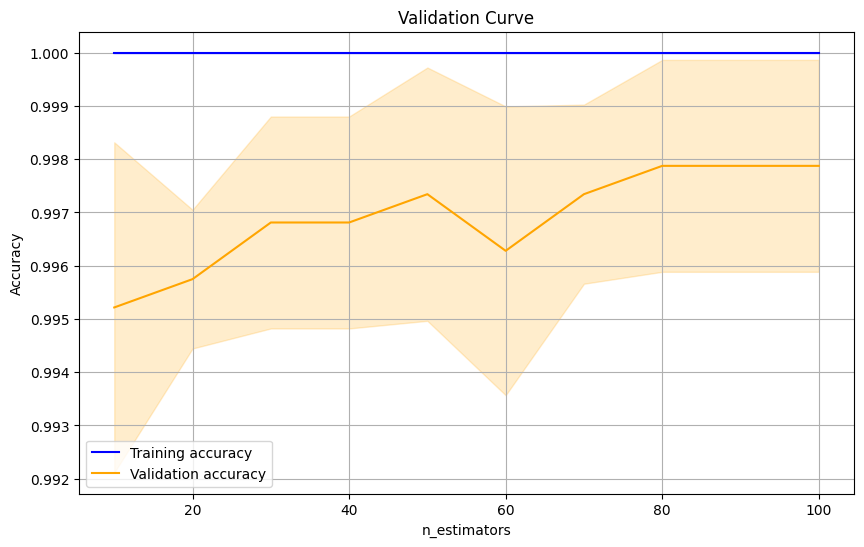

In [60]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(estimator, X, y, param_name, param_range, cv=5):
    """
    Plot validation curve for a given estimator.

    Parameters:
    - estimator: The machine learning model.
    - X: The input features.
    - y: The target labels.
    - param_name: The name of the hyperparameter to vary.
    - param_range: The range of values to test for the hyperparameter.
    - cv: The number of cross-validation folds.

    Returns:
    - None
    """
    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, cv=cv, scoring='accuracy'
    )

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_mean, label='Training accuracy', color='blue')
    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, alpha=0.2, color='blue')
    plt.plot(param_range, test_mean, label='Validation accuracy', color='orange')
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, alpha=0.2, color='orange')

    plt.title('Validation Curve')
    plt.xlabel(param_name)
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

# Vary the hyperparameter 'param_name' over the range of values 'param_range'
# and plot the validation curve
plot_validation_curve(rf_model, X_train, y_train, param_name='n_estimators', param_range=np.arange(10, 101, 10))


Both validation ans learning_curves indicate that the model is generalizing well on unseen data and not overfitting. Overall, this pattern suggests that the model has high capacity and performs well on both the training and validation sets. However, since the training curve is already at maximum
 accuracy, further increasing model complexity (e.g., by increasing the number of trees) is unlikely to significantly improve generalization performance. This situation might indicate that the model is already sufficiently complex and might not benefit much from additional complexity.